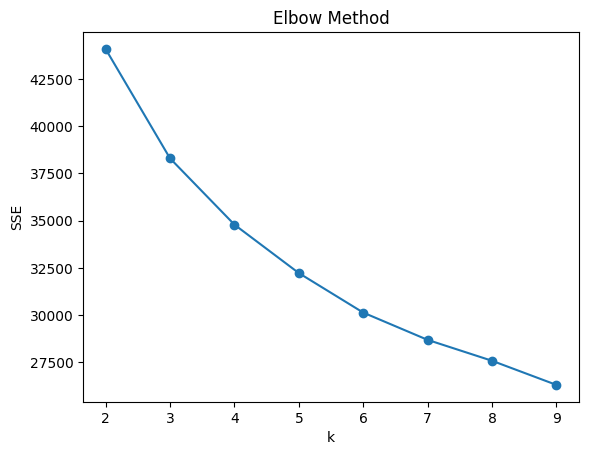

         Gender        Contract  Internet Service
cluster                                          
0        Female  Month-to-Month                 1
1          Male  Month-to-Month                 1
2          Male        Two Year                 0


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv("/content/dim_customers.csv")

features = [
    "Age", "Gender", "State", "Married", "Dependents",
    "Device Protection Plan", "Internet Service", "Internet Type",
    "Contract", "Payment Method"
]

df_selected = df[features]

df_encoded = pd.get_dummies(df_selected, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

sse = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.plot(range(2,10), sse, marker='o')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("SSE")
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)


print(df.groupby("cluster")[["Gender", "Contract", "Internet Service"]].agg(lambda x: x.value_counts().index[0]))


In [8]:
cluster_summary = df.groupby("cluster").agg({
    "Age": "mean",
    "Gender": lambda x: x.value_counts().idxmax(),
    "State": lambda x: x.value_counts().idxmax(),
    "Married": lambda x: x.value_counts().idxmax(),
    "Dependents": lambda x: x.value_counts().idxmax(),
    "Device Protection Plan": lambda x: x.value_counts().idxmax(),
    "Internet Service": lambda x: x.value_counts().idxmax(),
    "Internet Type": lambda x: x.value_counts().idxmax(),
    "Contract": lambda x: x.value_counts().idxmax(),
    "Payment Method": lambda x: x.value_counts().idxmax()
}).reset_index()

In [9]:
for c in cluster_summary.index:
    print(f"\n📌 Cluster {c} Profile")
    print(f"- Average Age: {cluster_summary.loc[c, 'Age']:.1f}")
    print(f"- Most Common Gender: {cluster_summary.loc[c, 'Gender']}")
    print(f"- Most Common State: {cluster_summary.loc[c, 'State']}")
    print(f"- Marital Status: {cluster_summary.loc[c, 'Married']}")
    print(f"- Dependents: {cluster_summary.loc[c, 'Dependents']}")
    print(f"- Device Protection Plan: {cluster_summary.loc[c, 'Device Protection Plan']}")
    print(f"- Internet Service: {cluster_summary.loc[c, 'Internet Service']}")
    print(f"- Internet Type: {cluster_summary.loc[c, 'Internet Type']}")
    print(f"- Contract Type: {cluster_summary.loc[c, 'Contract']}")
    print(f"- Payment Method: {cluster_summary.loc[c, 'Payment Method']}")


📌 Cluster 0 Profile
- Average Age: 44.7
- Most Common Gender: Female
- Most Common State: California
- Marital Status: 0
- Dependents: 0
- Device Protection Plan: 0
- Internet Service: 1
- Internet Type: DSL
- Contract Type: Month-to-Month
- Payment Method: Bank Withdrawal

📌 Cluster 1 Profile
- Average Age: 48.6
- Most Common Gender: Male
- Most Common State: California
- Marital Status: 0
- Dependents: 0
- Device Protection Plan: 0
- Internet Service: 1
- Internet Type: Fiber Optic
- Contract Type: Month-to-Month
- Payment Method: Bank Withdrawal

📌 Cluster 2 Profile
- Average Age: 42.9
- Most Common Gender: Male
- Most Common State: California
- Marital Status: 0
- Dependents: 0
- Device Protection Plan: 0
- Internet Service: 0
- Internet Type: No Internet
- Contract Type: Two Year
- Payment Method: Credit Card


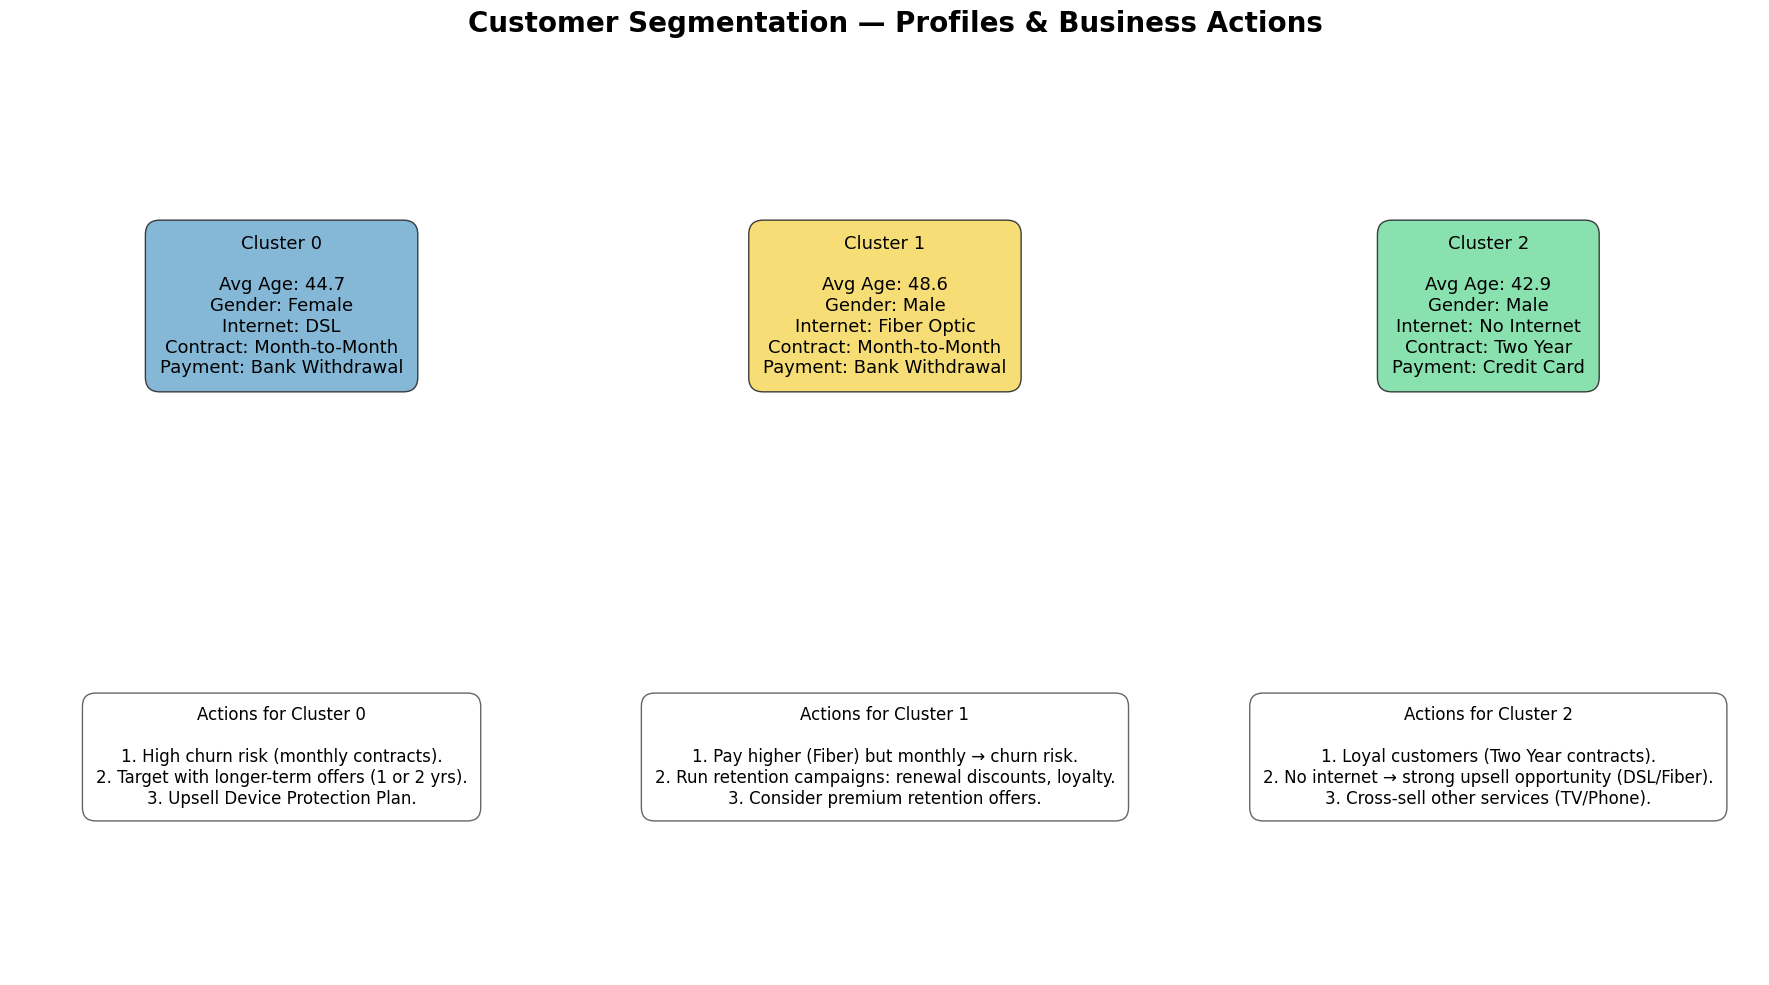

Saved infographic to: customer_profiles_infographic.png


In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------
profiles = {
    0: {
        "Avg Age": "44.7",
        "Gender": "Female",
        "Internet": "DSL",
        "Contract": "Month-to-Month",
        "Payment": "Bank Withdrawal"
    },
    1: {
        "Avg Age": "48.6",
        "Gender": "Male",
        "Internet": "Fiber Optic",
        "Contract": "Month-to-Month",
        "Payment": "Bank Withdrawal"
    },
    2: {
        "Avg Age": "42.9",
        "Gender": "Male",
        "Internet": "No Internet",
        "Contract": "Two Year",
        "Payment": "Credit Card"
    }
}

interpretations = {
    0: [
        "High churn risk (monthly contracts).",
        "Target with longer-term offers (1 or 2 yrs).",
        "Upsell Device Protection Plan."
    ],
    1: [
        "Pay higher (Fiber) but monthly → churn risk.",
        "Run retention campaigns: renewal discounts, loyalty.",
        "Consider premium retention offers."
    ],
    2: [
        "Loyal customers (Two Year contracts).",
        "No internet → strong upsell opportunity (DSL/Fiber).",
        "Cross-sell other services (TV/Phone)."
    ]
}
# -------------------------

n_clusters = len(profiles)
fig = plt.figure(figsize=(18, 10))
fig.suptitle("Customer Segmentation — Profiles & Business Actions", fontsize=20, weight="bold")

colors = ["#7FB3D5", "#F7DC6F", "#82E0AA"]

for i, (cluster_id, info) in enumerate(profiles.items()):
    ax = fig.add_subplot(2, n_clusters, 1 + i)
    ax.axis("off")
    ax.set_facecolor(colors[i])
    title = f"Cluster {cluster_id}"
    text = (
        f"{title}\n\n"
        f"Avg Age: {info['Avg Age']}\n"
        f"Gender: {info['Gender']}\n"
        f"Internet: {info['Internet']}\n"
        f"Contract: {info['Contract']}\n"
        f"Payment: {info['Payment']}"
    )
    ax.text(0.5, 0.5, text, fontsize=13, ha="center", va="center", wrap=True,
            bbox=dict(boxstyle="round,pad=0.8", facecolor=colors[i], edgecolor="#333", alpha=0.95))

for i, (cluster_id, actions) in enumerate(interpretations.items()):
    ax = fig.add_subplot(2, n_clusters, 1 + n_clusters + i)
    ax.axis("off")
    ax.set_facecolor("#F2F3F4")
    title = f"Actions for Cluster {cluster_id}"
    action_text = "\n".join([f"{j+1}. {a}" for j, a in enumerate(actions)])
    full = f"{title}\n\n{action_text}"
    ax.text(0.5, 0.5, full, fontsize=12, ha="center", va="center", wrap=True,
            bbox=dict(boxstyle="round,pad=0.8", facecolor="white", edgecolor="#555", alpha=0.9))

plt.tight_layout(rect=[0, 0, 1, 0.96])

out_file = "customer_profiles_infographic.png"
plt.savefig(out_file, dpi=200)
plt.show()

print(f"Saved infographic to: {out_file}")
